<h1>Анализ поведения пользователей приложения<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-и-задачи-проекта" data-toc-modified-id="Описание-и-задачи-проекта-1">Описание и задачи проекта</a></span></li><li><span><a href="#Обзор-и-предобработка-данных" data-toc-modified-id="Обзор-и-предобработка-данных-2">Обзор и предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2.1">Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.2">Предобработка данных</a></span></li></ul></li><li><span><a href="#Проверка-данных" data-toc-modified-id="Проверка-данных-3">Проверка данных</a></span><ul class="toc-item"><li><span><a href="#Считаем-количество-событий,-пользователей-и-среднее-количество-событий-на-пользователя" data-toc-modified-id="Считаем-количество-событий,-пользователей-и-среднее-количество-событий-на-пользователя-3.1">Считаем количество событий, пользователей и среднее количество событий на пользователя</a></span></li><li><span><a href="#Определяем-период-для-анализа" data-toc-modified-id="Определяем-период-для-анализа-3.2">Определяем период для анализа</a></span></li><li><span><a href="#Проверяем-наличие-пользователей-у-всех-трех-групп" data-toc-modified-id="Проверяем-наличие-пользователей-у-всех-трех-групп-3.3">Проверяем наличие пользователей у всех трех групп</a></span></li></ul></li><li><span><a href="#Изучение-воронки-событий" data-toc-modified-id="Изучение-воронки-событий-4">Изучение воронки событий</a></span><ul class="toc-item"><li><span><a href="#Считаем-частоту-совершения-события,-уникальных-пользователей-и-долю-совершивших-каждое-из-них" data-toc-modified-id="Считаем-частоту-совершения-события,-уникальных-пользователей-и-долю-совершивших-каждое-из-них-4.1">Считаем частоту совершения события, уникальных пользователей и долю совершивших каждое из них</a></span></li><li><span><a href="#Строим-воронку-событий-и-определяем-долю-пользователей" data-toc-modified-id="Строим-воронку-событий-и-определяем-долю-пользователей-4.2">Строим воронку событий и определяем долю пользователей</a></span></li></ul></li><li><span><a href="#Изучение-результатов-эксперимента" data-toc-modified-id="Изучение-результатов-эксперимента-5">Изучение результатов эксперимента</a></span><ul class="toc-item"><li><span><a href="#Изучаем-данные-по-контрольным-группам-на-корректность-всех-механизмов-и-расчетов" data-toc-modified-id="Изучаем-данные-по-контрольным-группам-на-корректность-всех-механизмов-и-расчетов-5.1">Изучаем данные по контрольным группам на корректность всех механизмов и расчетов</a></span></li><li><span><a href="#Проведение-A/A-и-A/B-тестов" data-toc-modified-id="Проведение-A/A-и-A/B-тестов-5.2">Проведение A/A и A/B тестов</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6">Общий вывод</a></span></li></ul></div>

# Описание и задачи проекта

Мы работаем в стартапе, который продаёт продукты питания. Нам нужно разобраться, как ведут себя пользователи нашего мобильного приложения. 

Для ответа на этот вопрос нам потребуется:

1. Сделать обзор, преодобработку и проверку данных;


2. Изучить `воронку продаж`. Узнать, как пользователи доходят до покупки, сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах и на каких именно;


3. Исследовать результаты `A/A/B-эксперимента`. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Нам нужно выяснить, какой шрифт лучше.

**Описание данных**

В нашем распоряжения файл с логамиКаждая запись в логе — это действие пользователя, или событие. 

- `EventName` — название события;

- `DeviceIDHash` — уникальный идентификатор пользователя;
- `EventTimestamp` — время события;
- `ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

# Обзор и предобработка данных

## Обзор данных

In [1]:
# Импортируем необходимые библиотеки

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scipy.stats as st
import math as mth
import numpy as np

In [2]:
# Создадим переменную с данными из датасета
logs = pd.read_csv('logs_exp.csv', sep='\t')

In [3]:
# Создадим функцию для обзора данных: выведем первые и последние 5 строк, общую информацию, количество и процент пропусков,
# кол-во и процент дубликатов и статистические данные по датафрейму. 
# Функция на вход будет принимать датафрейм.

def df_review(data):
    
    # Выведем первые и последние 5 строк из датафрейму
    print('{0:^125}'.format('Обзор данных датасета'))
    display(data)
    print('-'*120)
    
    # Выведем общую информацию по датафрейму
    print('{0:^125}'.format('Общая информация по датасету'),end='\n\n')
    data.info()
    print('-'*120)
    
    # Выведем кол-во и процент пропусков в колонках датафрейма
    print('{0:^125}'.format('Количество пропусков и их доля от всех строк в колонке'))
    # Посчитаем кол-во пропусков и их процент от общего числа строк в датафрейме по каждому столбцу
    num_of_nan = data.isnull().sum().to_frame().reset_index().merge \
    (round(data.isnull().mean()*100,2).to_frame().reset_index(), on='index', how='left')
    # Переимунуем названия колонок для удобства и выведем рез-т
    num_of_nan.columns = ['columns','nan_count','nan_ratio']
    display(num_of_nan.sort_values(by='nan_count', ascending=False))
    print('-'*120)
    
    # Посчитаем кол-во явных дубликатов в датафрейме
    print(f'Количество явных дубликатов в датасете: {data.duplicated().sum()}, что составляет '
          f'{round((data.duplicated().sum()/data.shape[0])*100,2)}% от всех строк в датафрейме')
    print('-'*120,end='\n\n')
    
    # Выведем информацию по статистическим данным датафрейма
    print('{0:^125}'.format('Обзор cтатистических данных по датасету'))
    display(data.describe())

In [4]:
df_review(logs)

                                                    Обзор данных датасета                                                    


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


------------------------------------------------------------------------------------------------------------------------
                                                Общая информация по датасету                                                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
------------------------------------------------------------------------------------------------------------------------
                                   Количество пропусков и их доля от всех строк в колонке                                    


,columns,nan_count,nan_ratio
0,EventName,0,0.0
1,DeviceIDHash,0,0.0
2,EventTimestamp,0,0.0
3,ExpId,0,0.0


------------------------------------------------------------------------------------------------------------------------
Количество явных дубликатов в датасете: 413, что составляет 0.17% от всех строк в датафрейме
------------------------------------------------------------------------------------------------------------------------

                                           Обзор cтатистических данных по датасету                                           


,DeviceIDHash,EventTimestamp,ExpId
count,2.441260e+05,2.441260e+05,244126.000000
mean,4.627568e+18,1.564914e+09,247.022296
std,2.642425e+18,1.771343e+05,0.824434
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


Обзор датафрейма показал, что данные практичеси не нуждаются в предобработке, нам будет необходимо лишь только:

- Переименовать колонки в удобный нам стиль;
- Удалить явные дубликаты;
- Привести колонку `EventTimestamp` в формат даты;
- Создать дополнительно колонку с датой без времени.

Займемся этим в ходе предобработки данных

## Предобработка данных

In [5]:
# Заменим названия колонок согласно стилю 'snake_case'
logs.columns = ['event_name','device_id_hash','event_timestamp','exp_id']

In [6]:
# Удалим дубликаты
logs = logs.drop_duplicates()

In [7]:
# Приведем к нужному типу данных колонку 'event_timestammp'
logs['event_timestamp'] = pd.to_datetime(logs['event_timestamp'], unit='s')

In [8]:
# Создадим новую колонкую с датами без времени
logs['date'] = logs['event_timestamp'].astype('datetime64[D]')

# Проверка данных

## Считаем количество событий, пользователей и среднее количество событий на пользователя

In [9]:
# Считаем количество событий в дф

print('Всего событий в датафрейме:', len(logs['event_name']))
print('Всего уникальных типов событий в датафрейме:', len(logs['event_name'].unique()))
print('Названия событий:', logs['event_name'].unique())

Всего событий в датафрейме: 243713
Всего уникальных типов событий в датафрейме: 5
Названия событий: ['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']


In [10]:
# Считаем количество пользователей в дф
print('Всего уникальных пользователей в датафрейме:', len(logs['device_id_hash'].unique()))

Всего уникальных пользователей в датафрейме: 7551


In [11]:
#Считаем среднее кол-во событий на пользователя

avg_events = round(len(logs['event_name'])/len(logs['device_id_hash'].unique()))
print('Среднее количество событий на одного пользователя составляет:', avg_events)

Среднее количество событий на одного пользователя составляет: 32


Перед тем как полагаться на получившееся значение, нам следует сгруппировать данные по каждому пользователю и посчитать количество событий для каждого из них.

In [12]:
# Создадим дф с этими данными и посмотрим на статистическую информацию по колонке

logs_event_users = logs.groupby('device_id_hash').agg({'event_timestamp': 'count'})
logs_event_users.describe()

,event_timestamp
count,7551.000000
mean,32.275593
std,65.154219
min,1.000000
25%,9.000000
50%,20.000000
75%,37.000000
max,2307.000000


Мы видим, что медиана составляет `20`, а также максимальное значение в `2307` события на одного из пользователей, возможно, такие выбросы повлияли на увелечение среднего числа.

Для наглядности построим гистограммы с выбросами и без.

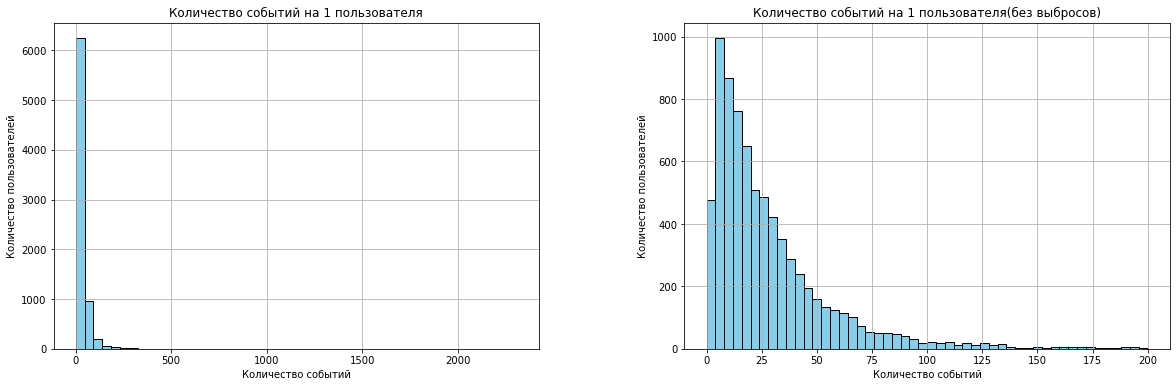

In [13]:
# Строим гистограммы 

fig, ax = plt.subplots(1,2, figsize=(20,6))

logs_event_users.hist(ax=ax[0],
                      bins=50,
                      color='skyblue',
                      ec='black')

logs_event_users.hist(ax=ax[1],
                      range=(0,200),
                      bins=50,
                      color='skyblue',
                      ec='black')

ax[0].set_title('Количество событий на 1 пользователя')
ax[0].set_xlabel('Количество событий')
ax[0].set_ylabel('Количество пользователей')
ax[1].set_title('Количество событий на 1 пользователя(без выбросов)')
ax[1].set_xlabel('Количество событий')
ax[1].set_ylabel('Количество пользователей')

plt.show()

По гистограммам мы также видим единичных пользователей с более чем `150 событиями`, поэтому за ориентир будем брать не среднее значение,а медианное в `20`

**Вывод:**

После изучения данных, мы выяснили, что всего событий в датафрейме: `243713` из них `5` уникальных типов, количество уникальных пользователей составляет: `7551`, а среднее количество событий на пользователя согласно медиане - `20`. 

## Определяем период для анализа

In [14]:
# Определяем минимальную и максимальную дату выборки

print('Минимальная дата:', logs['date'].min())
print('Максимальная дата:', logs['date'].max())
print('Анализируемый период составляет:', (logs['date'].max()-logs['date'].min()).days,'дней')

Минимальная дата: 2019-07-25 00:00:00
Максимальная дата: 2019-08-07 00:00:00
Анализируемый период составляет: 13 дней


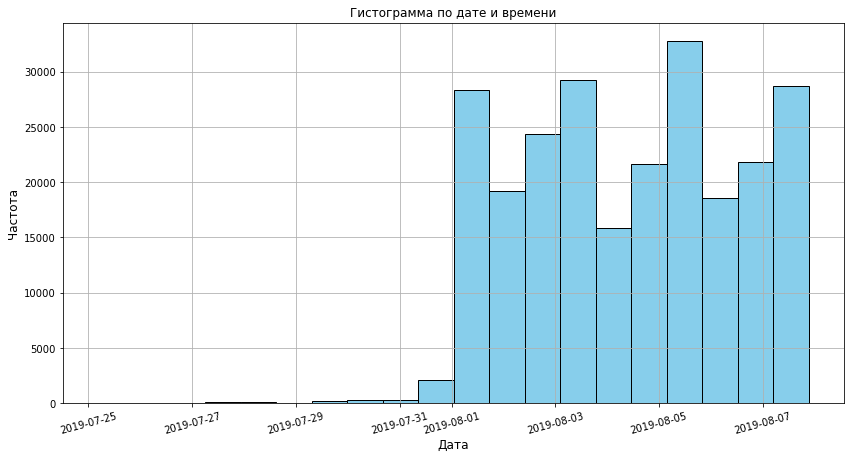

In [15]:
# Создадим гистограмму по дате и времени
plt.figure(figsize =(14, 7))

# Построим график
logs['event_timestamp'].hist(bins=20,
                             color='skyblue',
                             ec='black')

# Добавим необходимые настройки
plt.title('Гистограмма по дате и времени', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.xticks(rotation=15)
plt.show()

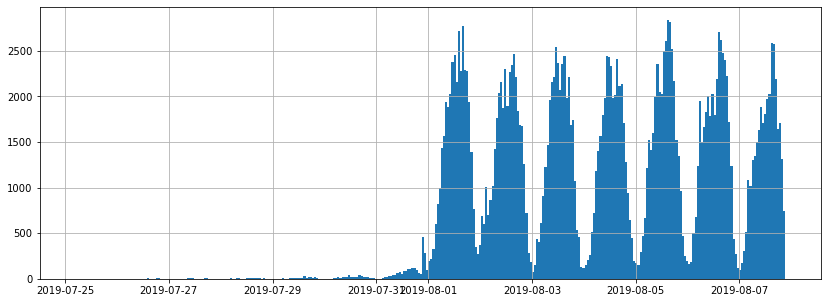

In [16]:
# код ревьюера
logs['event_timestamp'].hist(bins=14*24, figsize=(14, 5));

Исходя из гистограммы, мы видим что:

- В первые дни эксперимента, вплоть до `31 июля` частота значений была близка к нулевой относительно данных за последующие дни;
- `31 июля` частота наблюдений увеличилась примерно в `5 раз` относительно предыдущей даты, но все на порядок меньше того, что мы видим в данных, начиная с `1 августа`.

Согласно рекомендациям, тестирование следует проводить в течение `2 недель` - если есть такая возможность, для получения наиболее достоверного результата, но из-за неполноты данных в первую неделю и заметного прироста, начинающегося с `1 августа` будет целесообразно начать проведение эксперимента именно с этой даты и отсечь все то, что было ранее.

В итоге у нас останутся данные за `1 неделю`, начиная с `01-08-2019` и заканчивая `07-08-2019`, отфильтруем данные согласно этому периоду и оценим сколько событий и пользователей мы после этого потеряем.

In [17]:
# Создадим новый датафрейм с отфильтрованными данными
logs_new = logs.query('date > "2019-07-31"')

In [18]:
# Посмотрим сколько событий и пользователей мы потеряли после фильтрации дф

# Посчитаем количество отброшенных строк с данными по событиям и пользователям
event_diff = logs.shape[0] - logs_new.shape[0]
user_diff = logs['device_id_hash'].nunique() - logs_new['device_id_hash'].nunique()

# Рассчитаем долю этих строк от исходного датафрейма
event_diff_ratio = round(event_diff/logs.shape[0]*100,2)
user_diff_ratio = round(user_diff/logs['device_id_hash'].nunique()*100,2)

# Выведем результат
print(f'После фильтрации датафрейма, мы потеряли {event_diff} событий или {event_diff_ratio}% от исходных данных, а также ' 
      f'{user_diff} уникальных пользователей или  же {user_diff_ratio}% от исходных данных.')

После фильтрации датафрейма, мы потеряли 2826 событий или 1.16% от исходных данных, а также 17 уникальных пользователей или  же 0.23% от исходных данных.


**Вывод:** 

- Мы выяснили, что сбор данных проводился в период с `25 июля` по `7 августа`;
- В ходе фильтрации датафрейма, мы оставили только полные данные, которые начинались с `1 августа`, потеряв при этом незначительное количество информации, которая не повлияет на результаты нашего исследования.

## Проверяем наличие пользователей у всех трех групп

In [19]:
# Сгруппируем дф по группам и посмотрим сколько в каждой из них событий и уникальных пользователей

groups = (
    logs_new.groupby('exp_id', as_index=False)
    .agg(
        events_count=('device_id_hash', 'count'),
        users_count=('device_id_hash', 'nunique'),
    )
    .rename(columns={'exp_id': 'group'})
)

# Выведем результат
groups

,group,events_count,users_count
0,246,79302,2484
1,247,77022,2513
2,248,84563,2537


**Вывод:**

Мы видим, что во всех 3 группах есть примерно равное количество уникальных пользователей и событий.

Дополнительно проверим, нет ли такого, что один пользователь может одновременно состоять в нескольких группах, так как это может исказить непосредственное проведение эксперимента и интерпретацию результатов.

Для этого создадим функцию и пройдемся по каждой группе.

In [20]:
# Функция на вход будет принимать 2 аргумента: первую и вторую группу, далее будет проверяться есть ли пересечение пользователя
# Между группами, если нет - то в группах все пользователи уникальные, если да - то будет выведено количество пользователей
# Одновременно состоящих в нескольких группах

def crossed_users(a,b):
    
    # Считаем количество пользователей одновременно состоящих в обеих группах
    multiple_groups = len(np.intersect1d(logs_new.query('exp_id == @a')['device_id_hash'].unique(), \
                       logs_new.query('exp_id == @b')['device_id_hash'], assume_unique=False))
    
    # В зависимости от полученного результата будем выводить соответсвующее сообщение
    if multiple_groups == 0:
        print(f'Число пользователей состоящих одновременно в группе {a} и {b} составляет: {multiple_groups} человек, '
              f'а это значит, что все пользователи в группах уникальные.')
    else:
        print(f'В группах {a} и {b} одновременно состоят {multiple_groups} пользователя(-ей).')

In [21]:
# Проверим, есть ли пересечения пользователей, которые состоят в обеих контрольных группах
crossed_users(246,247)

Число пользователей состоящих одновременно в группе 246 и 247 составляет: 0 человек, а это значит, что все пользователи в группах уникальные.


In [22]:
# Проверим, есть ли пересечения пользователей, которые состоят в первой контрольной и экспериментальной группах
crossed_users(246,248)

Число пользователей состоящих одновременно в группе 246 и 248 составляет: 0 человек, а это значит, что все пользователи в группах уникальные.


In [23]:
# Проверим, есть ли пересечения пользователей, которые состоят во второй контрольной и экспериментальной группах
crossed_users(247,248)

Число пользователей состоящих одновременно в группе 247 и 248 составляет: 0 человек, а это значит, что все пользователи в группах уникальные.


**Вывод:**

После проведенных расчетов мы видим, что во всех 3 группах собраны только уникальные пользователи, которые друг с другом никак не пересекаются.

# Изучение воронки событий

## Считаем частоту совершения события, уникальных пользователей и долю совершивших каждое из них

In [24]:
# Сгруппируем данные по событиям и посчтитаем их общее количество и уникальных пользователей, приходящихся на это событие

logs_funnel = (
    logs_new
    .groupby('event_name', as_index=False)
    .agg(num_of_events=('event_name','count'),
         num_of_users=('device_id_hash','nunique'))
    .sort_values(by='num_of_events', ascending=False)
)

# Добавим колонку с долей пользователей, совершивших хоть раз каждое из событий
logs_funnel['share_of_event_among_users'] = (logs_funnel['num_of_users']/logs_new['device_id_hash'].nunique()*100) \
                                                                                                   .map('{0:.2f}%'.format)
                                                                                                        
# Выведем результат
logs_funnel

,event_name,num_of_events,num_of_users,share_of_event_among_users
1,MainScreenAppear,117328,7419,98.47%
2,OffersScreenAppear,46333,4593,60.96%
0,CartScreenAppear,42303,3734,49.56%
3,PaymentScreenSuccessful,33918,3539,46.97%
4,Tutorial,1005,840,11.15%


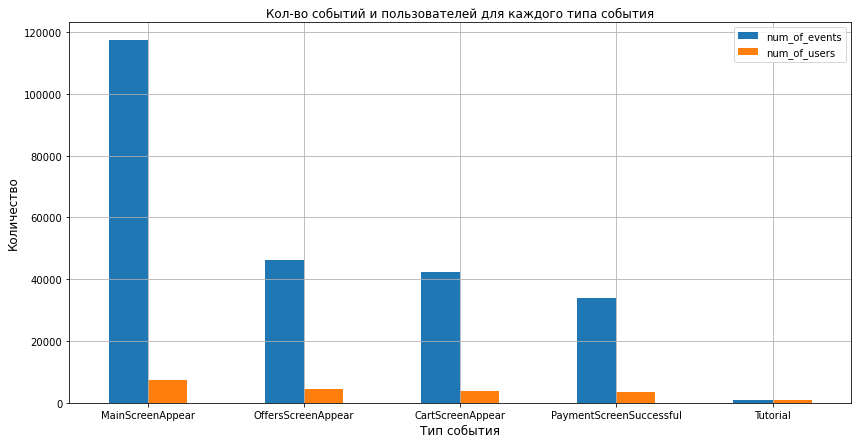

In [25]:
# Для большей наглядности построим график
logs_funnel[['event_name','num_of_events','num_of_users']].plot(kind='bar', x='event_name', figsize =(14, 7))

# Добавим необходимые настройки
plt.title('Кол-во событий и пользователей для каждого типа события', fontsize=12)
plt.xlabel('Тип события',fontsize=12)
plt.ylabel('Количество',fontsize=12)
plt.xticks(rotation=0)
plt.grid()
plt.show()

**Вывод:**

Как уже было сказано мной ранее в `3 разделе` проекта мы располагаем `5 событиями`, которые по своей частоте, судя по таблице и графику, отражают непосредственно путь каждого пользователя, за исключением события `Tutorial`, что подразумевает некое обучение, возможно, по функциональным возможностям приложения, поэтому это событие необязательное и его пропускает подавляющее большинство пользователей, как следствие - оно имеет наименьшее показатели.

Поэтому, в дальнейшем, наша воронка не будет включать в себя событие `Tutorial`, а будет состоять из следующих этапов:

1. `MainScreenAppear` - пользователь увидел главное меню приложения (совершило `98.47%` пользователей)

2. `OffersScreenAppear` - пользователь увидел  каталог/предложения с товарами (совершило `60.96%` пользователей)
3. `CartScreenAppear` - пользователь увидел экран с корзиной (совершило `49.56%` пользователей)
4. `PaymentScreenSuccessful` - пользователь увидел  экран завершенной покупки (совершило `46.97%` пользователей)

## Строим воронку событий и определяем долю пользователей

In [ ]:
# Удалим событие `Tutorial`
logs_funnel = logs_funnel.head(4)

# Строим воронку событий, добавив информацию о том, какая доля пользователей проходит на следующий шаг от первого и предыдущего
fig = go.Figure(go.Funnel(
    y = logs_funnel['event_name'],
    x = logs_funnel['num_of_users'],
    textposition = "inside",
    textinfo = "value+percent initial+percent previous"
))

# Добавим настройки и выведем график
fig.update_layout(
    title='Воронка по числу пользователей, доли прошедших с первого шага и доли прошедших с предыдущего шага',
    yaxis_title="Шаги",
    font=dict(size=11)
)

# Выводим график
fig.show()

<img src="https://ltdfoto.ru/images/2023/07/10/newplot-1.png" alt="newplot-1.png" border="0" />

In [27]:
# Оставим необходимые колонки
logs_funnel_ratio = logs_funnel[['event_name','num_of_users','share_of_event_among_users']]

# Рассчитаем долю пользователей прошедших на следующий шаг с предыдущего
logs_funnel_ratio['share_of_previous_step'] = (logs_funnel_ratio['num_of_users']/logs_funnel_ratio['num_of_users'] \
                                                                            .shift(1,fill_value =7419)*100).map('{:.2f}%'.format)
# Рассчитаем долю пользователей прошедших на следующий шаг с первого
logs_funnel_ratio['share_of_initial_step'] = (logs_funnel_ratio['num_of_users']/logs_funnel_ratio['num_of_users'].max()*100) \
                                                                                                            .map('{:.2f}%'.format)

# Выведем результат
logs_funnel_ratio

,event_name,num_of_users,share_of_event_among_users,share_of_previous_step,share_of_initial_step
1,MainScreenAppear,7419,98.47%,100.00%,100.00%
2,OffersScreenAppear,4593,60.96%,61.91%,61.91%
0,CartScreenAppear,3734,49.56%,81.30%,50.33%
3,PaymentScreenSuccessful,3539,46.97%,94.78%,47.70%


**Вывод:**

Исходя из графика воронки событий, мы видим, что:

- Больше всего пользователей теряются на 2 шаге (около `38%`), недостаточно информации для ответа на вопрос о причинах такого явления, как вариант, это могут быть проблемы технического характера приложения, но при этом в остальных шагах, по сравнению со 2 мы наблюдаем относительно минимальные потери пользователей (примерно `19%` в 3 шаге и всего `5%` в 4 шаге).


- Около `48%` или `3539` пользователей из первого шага доходят до успешной оплаты заказа, что можно считать вполне успешным показателем (практически каждый 2 пользователь, увидевший главное меню, совершает покупку в нашем приложении)

In [28]:
# Было бы интересно посмотреть на разницу воронок событий в разрезе каждой группы, для этого подготовим дф с необходимой информацией

logs_pivot = (
    logs_new.query('event_name != "Tutorial"')
    .pivot_table(index='event_name', 
                 columns='exp_id', 
                 values= 'device_id_hash', 
                 aggfunc='nunique')
    .reset_index()
    .sort_values(by=246,ascending=False)
    

)

logs_pivot.columns = ['event_name',246,247,248]
logs_pivot

,event_name,246,247,248
1,MainScreenAppear,2450,2476,2493
2,OffersScreenAppear,1542,1520,1531
0,CartScreenAppear,1266,1238,1230
3,PaymentScreenSuccessful,1200,1158,1181


**Вывод:**

По каждой из групп мы видим, что наиболее популярным событием так же как и при расчетах без разбивки является `MainScreenAppear`, и в целом, последовательность событий не имеет никаких различий.

In [ ]:
# Строим воронку событий для каждой группы
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = '246 группа',
    y = logs_pivot['event_name'],
    x = logs_pivot[246],
    textinfo = "value+percent initial+percent previous"))

fig.add_trace(go.Funnel(
    name = '247 группа',
    y = logs_pivot['event_name'],
    x = logs_pivot[247],
    textposition = "inside",
    textinfo = "value+percent initial+percent previous"))

fig.add_trace(go.Funnel(
    name = '248 группа',
    y = logs_pivot['event_name'],
    x = logs_pivot[248],
    textposition = "inside",
    textinfo = "value+percent initial+percent previous"))

# Добавим настройки и выведем график

fig.update_layout(
    title='Воронка по числу пользователей, доли прошедших с первого шага и доли прошедших с предыдущего шага (группы)',
    yaxis_title="Шаги",
    font=dict(size=11)
)

# Выводим график
fig.show()

<img src="https://ltdfoto.ru/images/2023/07/10/newplot.png" alt="newplot.png" border="0" />

**Вывод:**

В разрезе групп мы видим практически идентичную картину, как и в общей воронке событий, поэтому, все что было сказано выше, актуально и для каждой группы в отдельности.

# Изучение результатов эксперимента

## Изучаем данные по контрольным группам на корректность всех механизмов и расчетов

Нам нужно выяснить есть ли статистически значимые отличия в долях пользователей соверших каждое из событий, сначала проведя `A/A тест`, затем `A/B тест` (сравнив экспериментальную `248` группы с контрольными `246` и `247` и объединенную контрольную соответсвтенно).

Начнем с проведения `A/A теста`, перед этим определив критерий его успешного проведения.

Критерии успешного `A/A-теста`: 

1. Попавший в одну из групп посетитель остаётся в этой группе до конца теста. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно;
2. Количество пользователей в различных группах различается не более, чем на `1%`;
3. Различие ключевых метрик по группам не превышает `1%` и не имеет статистической значимости.

Ранее в разделе `3.3` мы выяснили, что во всех 3 группах есть пользователи и в каждой из них они уникальные.

In [30]:
# Посмотрим на сколько отличается количество пользователей в группах 247 и 246

diff = groups.loc[1,'users_count'] - groups.loc[0,'users_count'] 
diff_ratio = round((groups.loc[1,'users_count']/groups.loc[0,'users_count']*100)-100,2).astype(str) + '%'
print(f'По количеству пользователей группа 247 превышает 246 на {diff_ratio} или {diff} человек. '
      f'Будем считать это превышение в пределах нормы.')

По количеству пользователей группа 247 превышает 246 на 1.17% или 29 человек. Будем считать это превышение в пределах нормы.


После проверки всех критериев нам осталось подготовить две таблицы, которые будут использоваться нашей функцией для проведения `A/A и A/B тестов`:

1. Таблица с количеством уникальных пользователей по каждому событию (мы ее уже делали в разделе `4.2`) нам осталось лишь только добавить в нее колонку с объединенной контрольной группой;


2. Таблица с количеством уникальных пользователей в каждой группе.

In [31]:
# Добавляем колонку с объединенной контрольной группой

logs_pivot['246+247'] = logs_pivot[246] + logs_pivot[247]
logs_pivot.set_index('event_name', inplace=True)
logs_pivot

,246,247,248,246+247
event_name,,,,
MainScreenAppear,2450,2476,2493,4926
OffersScreenAppear,1542,1520,1531,3062
CartScreenAppear,1266,1238,1230,2504
PaymentScreenSuccessful,1200,1158,1181,2358


In [32]:
# Создаем таблицу с кол-вом уникальных пользователей в каждой группе

logs_pivot_users = (
    logs_new.query('event_name != "Tutorial"')
    .pivot_table(columns='exp_id', 
                 values= 'device_id_hash', 
                 aggfunc='nunique').sort_values(by=246,ascending=False)
)
logs_pivot_users['246+247'] = logs_pivot_users[246] + logs_pivot_users[247]
logs_pivot_users

exp_id,246,247,248,246+247
device_id_hash,2483,2512,2535,4995


## Проведение A/A и A/B тестов

Перед проведением тестов сформулируем гипотезы:

- **H₀ (нулевая гипотеза)** - различий между долями групп нет;
- **H₁ (альтернативная гипотеза)** - различия между долями групп есть



Для проверки гипотез будет использоваться `z-критерий`, но так как мы проводим множественное сравнение (4 `A/A теста` и 12 `A/B тестов`) мы будем использовать критичекий уровень статистической значимости с учетом `поправки Бонферрони` (в нашем случае делить на `16`).

Создадим функцию, которая будет проверять наши гипотезы с учетом `поправки Бонферрони` и далее проведем все тесты.

In [33]:
def test(group1, group2, event):
    
    alpha = .05/16 # критический уровень статистической значимости с учетом поправки Бонферрони
    
    successes = np.array([logs_pivot.loc[event,group1], logs_pivot.loc[event,group2]])
    trials = np.array([logs_pivot_users.loc['device_id_hash',group1], logs_pivot_users.loc['device_id_hash',group2]])
    
    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]
    
    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]
    
    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
    
    # разница пропорций в датасетах
    difference = p1 - p2 
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print(f'Проверка для групп {group1} и {group2}, событие: {event}, p-значение: {p_value}')
    
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу о равенстве долей в группах")
    else:
        print("Не получилось отвергнуть нулевую гипотезу о равенстве долей в группах")

In [34]:
# Проводим A/A тест между контрольными группами 246 и 247

for event in logs_pivot.index:
    test(246, 247, event)
    print()

Проверка для групп 246 и 247, событие: MainScreenAppear, p-значение: 0.7526703436483038
Не получилось отвергнуть нулевую гипотезу о равенстве долей в группах

Проверка для групп 246 и 247, событие: OffersScreenAppear, p-значение: 0.24786096925282264
Не получилось отвергнуть нулевую гипотезу о равенстве долей в группах

Проверка для групп 246 и 247, событие: CartScreenAppear, p-значение: 0.22867643757335676
Не получилось отвергнуть нулевую гипотезу о равенстве долей в группах

Проверка для групп 246 и 247, событие: PaymentScreenSuccessful, p-значение: 0.11446627829276612
Не получилось отвергнуть нулевую гипотезу о равенстве долей в группах



**Вывод:**

После проведения `A/A теста`, мы видим, что в контрольных группах `246` и `247` нет статистически значимой разницы в долях, а значит разбиение на группы работает корректно и дальнейший `A/B тест` должен показать достоверные результаты.

Теперь приступим к проведению `A/B теста`.

In [35]:
# A/B тест контрольной группы 246 и экспериментальной 248

for event in logs_pivot.index:
    test(246, 248, event)
    print()

Проверка для групп 246 и 248, событие: MainScreenAppear, p-значение: 0.3387114076159288
Не получилось отвергнуть нулевую гипотезу о равенстве долей в группах

Проверка для групп 246 и 248, событие: OffersScreenAppear, p-значение: 0.21442476639710506
Не получилось отвергнуть нулевую гипотезу о равенстве долей в группах

Проверка для групп 246 и 248, событие: CartScreenAppear, p-значение: 0.08067367598823139
Не получилось отвергнуть нулевую гипотезу о равенстве долей в группах

Проверка для групп 246 и 248, событие: PaymentScreenSuccessful, p-значение: 0.21693033984516674
Не получилось отвергнуть нулевую гипотезу о равенстве долей в группах



In [36]:
# A/B тест контрольной группы 247 и экспериментальной 248

for event in logs_pivot.index:
    test(247, 248, event)
    print()

Проверка для групп 247 и 248, событие: MainScreenAppear, p-значение: 0.5194964354051703
Не получилось отвергнуть нулевую гипотезу о равенстве долей в группах

Проверка для групп 247 и 248, событие: OffersScreenAppear, p-значение: 0.9333751305879443
Не получилось отвергнуть нулевую гипотезу о равенстве долей в группах

Проверка для групп 247 и 248, событие: CartScreenAppear, p-значение: 0.5878284605111943
Не получилось отвергнуть нулевую гипотезу о равенстве долей в группах

Проверка для групп 247 и 248, событие: PaymentScreenSuccessful, p-значение: 0.7275718682261119
Не получилось отвергнуть нулевую гипотезу о равенстве долей в группах



In [37]:
# A/B тест объединенной контрольной группы 246+247 и экспериментальной 248

for event in logs_pivot.index:
    test('246+247', 248, event)
    print()

Проверка для групп 246+247 и 248, событие: MainScreenAppear, p-значение: 0.3486684291093256
Не получилось отвергнуть нулевую гипотезу о равенстве долей в группах

Проверка для групп 246+247 и 248, событие: OffersScreenAppear, p-значение: 0.44582745409482394
Не получилось отвергнуть нулевую гипотезу о равенстве долей в группах

Проверка для групп 246+247 и 248, событие: CartScreenAppear, p-значение: 0.18683558686831558
Не получилось отвергнуть нулевую гипотезу о равенстве долей в группах

Проверка для групп 246+247 и 248, событие: PaymentScreenSuccessful, p-значение: 0.6107918742187335
Не получилось отвергнуть нулевую гипотезу о равенстве долей в группах



**Вывод:**

После проведения `A/B тестов` между экспериментальной, двумя контрольными и объединенной контрольной группой, мы видим, что во всех тестах статистически значимых отличий в долях не наблюдается, а это значит, что изменение шрифта в приложении **не повлияло** на поведение пользователей.

# Общий вывод

В ходе нашего исследования мы проделали следующие шаги:

1. Познакомились и предобработали данные;
2. Сделали проверку данных;
3. Изучили воронку событий;
4. Провели A/A и A/B тесты.

Подытожим результаты нашего исследования:

1. В нашем логе более `243 тысяч` событий, `7551` уникальных пользователей, где на каждого в среднем приходится около `20` событий;


2. Эксперимент проводился с `25 июля` по `7 августа`, в ходе анализа, мы выяснили, что полные данные предоставлены только за период с `1` по `7 августа`, поэтому было решено исследовать только данный промежуток времени, потеряв при этом более `1%` событий и менее `0.5%` уникальных пользователей;


3. Самым популярным событием было `MainScreenAppear` (взаимодествие с главным экраном), в среднем более `98%` совершали это действие. Воронка событий выглядела следующим образом:

    - `MainScreenAppear` - пользователь увидел главное меню приложения (совершило 98.47% пользователей)
    
    - `OffersScreenAppear` - пользователь увидел каталог/предложения с товарами (совершило 60.96% пользователей)
    - `CartScreenAppear` - пользователь увидел экран с корзиной (совершило 49.56% пользователей)
    - `PaymentScreenSuccessful` - пользователь увидел экран завершенной покупки (совершило 46.97% пользователей)
    
    
4. Больше всего пользователей терялось на шаге `OffersScreenAppear` (`38%` от от общего количества). До успешной оплаты добирались практически `50%` пользователей (практически каждый второй пользователь совершал покупку в нашем приложении);


5. По результатам `A/A теста` между двумя контрольными группами не оказалось статистически значимых различий;


6. По результатам `A/B тестов` также не было выявлено статистически значимых различий, что говорит нам о том, что изменение шрифта **не привело** к кардинальным изменениям в поведении пользователей

**Рекомендации:** 

- Если есть такая возможность, то можно попробовать повторить данное тестирование, но при этом провести его в течение более длительного срока, чтобы убедиться в том, что различий по конверсии в группах действительно не наблюдается и что текущий результат не был получен случайным образом;



- Если такой возможности нет, то, в целом, можно как оставить так и отказаться от нового шрифта, так как по результатам `А/В-теста` он никак не ухудшил пользовательский опыт.